In [100]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [101]:
data = pd.read_excel('binary_metal_enery.xlsx',sheet_name='OH_free_energy')

In [102]:
# data = data.dropna() # 删除缺失值 
data.head()

Unnamed: 0                       Structure          ψ      Nnear     χnear  \
0           0  AgIr_mp-1183229-bridge2OH.vasp  20.502531   9.949874  2.060582   
1           1  AgIr_mp-1183229-bridge3OH.vasp  20.646011  10.008773  2.052662   
2           2  AgIr_mp-1183229-bridge4OH.vasp  20.502531   9.949874  2.060582   
3           3  AgIr_mp-1183229-bridge5OH.vasp  19.800000  10.288276  2.016102   
4           4  AgIr_mp-1183229-hollow6OH.vasp  19.800000  10.093519  2.041400   

        GCN  CN        Np    L-Bond     △G*OH  
0  7.250000  12  5.477226  2.303852  0.646847  
1  8.789474  17  5.477226  2.675143  1.229492  
2  6.375000  10  5.477226  2.142468  0.191494  
3  7.631579  15  5.477226  2.411992  0.633768  
4  6.272727   7  5.477226  2.088187  0.327195

In [103]:
data = data.iloc[:,2:]
data.head()

ψ      Nnear     χnear       GCN  CN        Np    L-Bond     △G*OH
0  20.502531   9.949874  2.060582  7.250000  12  5.477226  2.303852  0.646847
1  20.646011  10.008773  2.052662  8.789474  17  5.477226  2.675143  1.229492
2  20.502531   9.949874  2.060582  6.375000  10  5.477226  2.142468  0.191494
3  19.800000  10.288276  2.016102  7.631579  15  5.477226  2.411992  0.633768
4  19.800000  10.093519  2.041400  6.272727   7  5.477226  2.088187  0.327195

In [104]:
data.duplicated().sum()  # 若果是0表述没有重复数据

0

In [105]:
data.info()# 查看数据基本信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ψ       468 non-null    float64
 1   Nnear   468 non-null    float64
 2   χnear   468 non-null    float64
 3   GCN     468 non-null    float64
 4   CN      468 non-null    int64  
 5   Np      468 non-null    float64
 6   L-Bond  468 non-null    float64
 7   △G*OH   468 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 29.4 KB


In [106]:
data = data.dropna() # 删除缺失值 

In [107]:
data.describe() # 查看数据基本信息

ψ       Nnear       χnear         GCN          CN          Np  \
count  468.000000  468.000000  468.000000  468.000000  468.000000  468.000000   
mean    18.388997    9.237659    1.978074    6.845289   11.647436    4.649521   
std      3.138899    0.927171    0.154964    0.959491    3.619134    0.545083   
min     10.850000    7.000000    1.550000    3.428571    4.000000    4.000000   
25%     16.590122    8.485281    1.871678    6.480263    8.000000    4.000000   
50%     18.800000    9.376516    2.016409    7.166667   13.000000    4.472136   
75%     20.900000   10.000000    2.072712    7.500000   15.000000    4.898979   
max     22.800000   11.000000    2.259731    8.789474   20.000000    6.000000   

           L-Bond       △G*OH  
count  468.000000  468.000000  
mean     2.085443    0.388582  
std      0.172947    0.558787  
min      1.792167   -1.781951  
25%      1.970390    0.046212  
50%      2.077123    0.403665  
75%      2.184541    0.766730  
max      2.724780    1.830569

In [108]:
# 计算变量之间的pearson相关系数
CORR = data.corr(method='pearson')
print(CORR)

               ψ     Nnear     χnear       GCN        CN        Np    L-Bond  \
ψ       1.000000  0.540762  0.433146  0.170692  0.061452  0.445687  0.305178   
Nnear   0.540762  1.000000  0.502324  0.096906  0.031265  0.186340  0.082001   
χnear   0.433146  0.502324  1.000000  0.259005  0.114844  0.757285  0.270911   
GCN     0.170692  0.096906  0.259005  1.000000  0.662910  0.327013  0.526033   
CN      0.061452  0.031265  0.114844  0.662910  1.000000  0.178169  0.711954   
Np      0.445687  0.186340  0.757285  0.327013  0.178169  1.000000  0.408094   
L-Bond  0.305178  0.082001  0.270911  0.526033  0.711954  0.408094  1.000000   
△G*OH   0.720115  0.497476  0.519617  0.257347  0.102729  0.538025  0.295328   

           △G*OH  
ψ       0.720115  
Nnear   0.497476  
χnear   0.519617  
GCN     0.257347  
CN      0.102729  
Np      0.538025  
L-Bond  0.295328  
△G*OH   1.000000  


<AxesSubplot:>

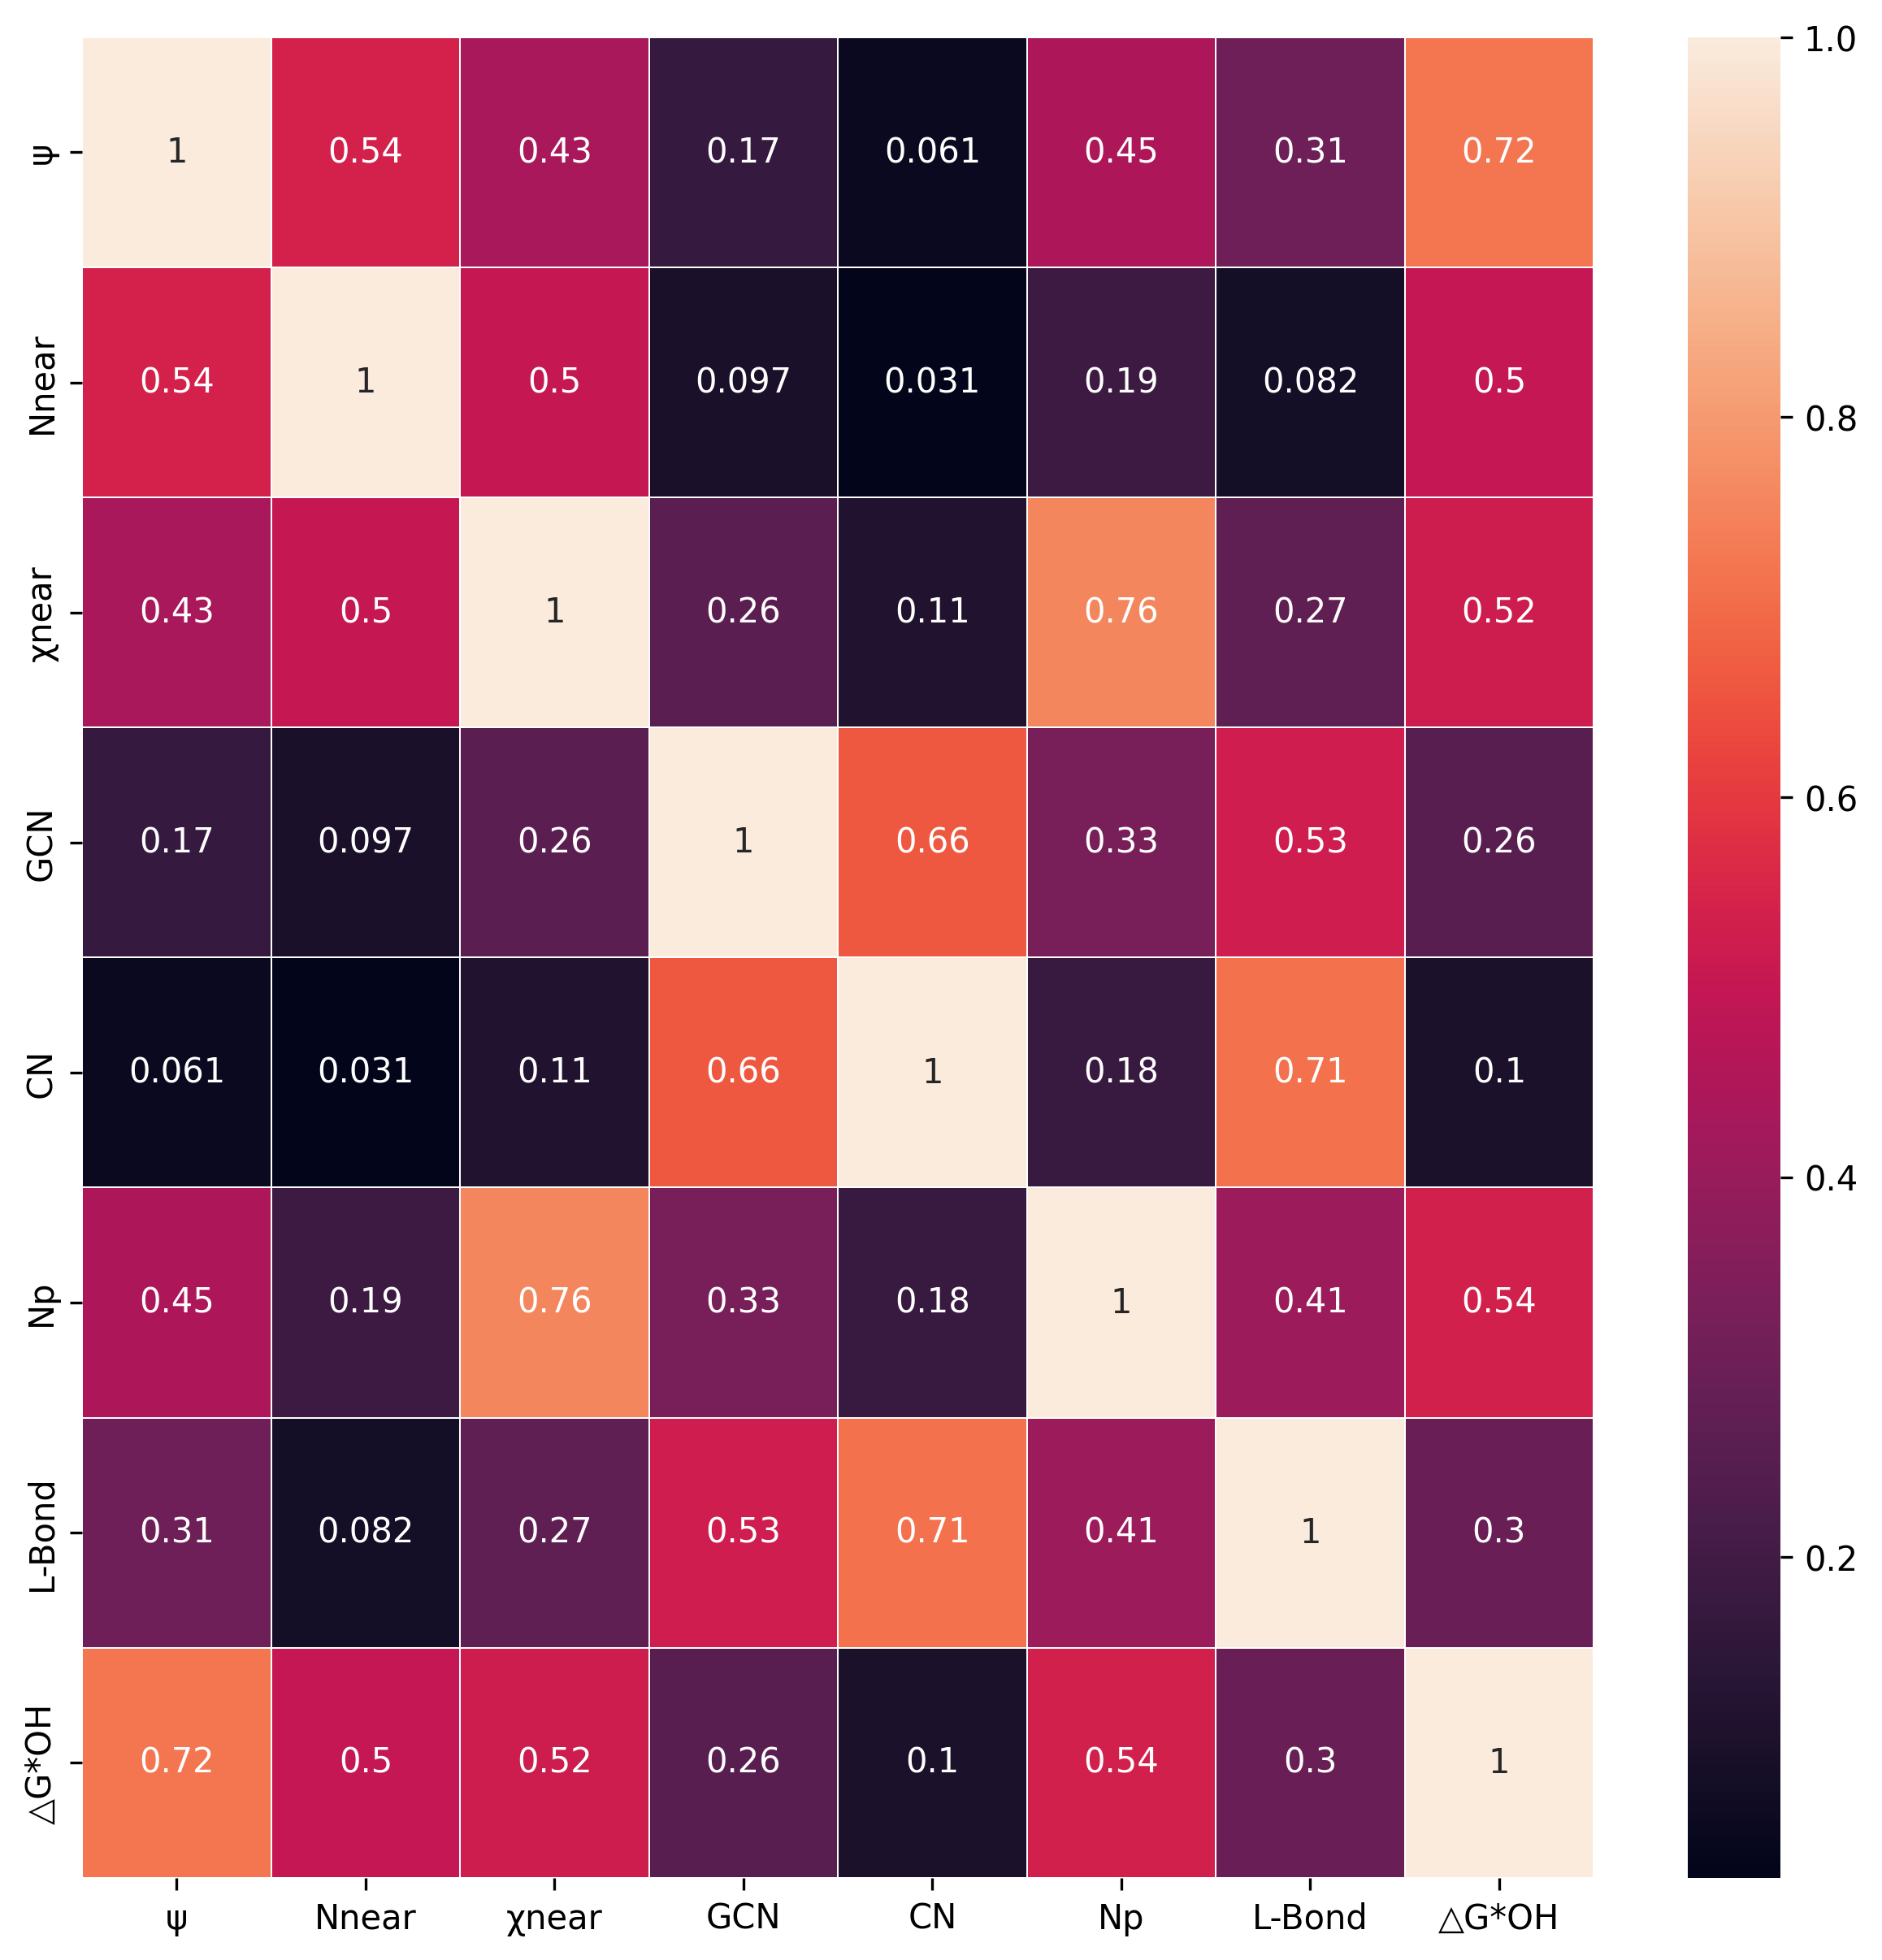

In [109]:
import  seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10),dpi=300)
sns.heatmap(CORR,annot=True,linewidths=0.1)

In [110]:
corrrlation_features = set()
CORR

ψ     Nnear     χnear       GCN        CN        Np    L-Bond  \
ψ       1.000000  0.540762  0.433146  0.170692  0.061452  0.445687  0.305178   
Nnear   0.540762  1.000000  0.502324  0.096906  0.031265  0.186340  0.082001   
χnear   0.433146  0.502324  1.000000  0.259005  0.114844  0.757285  0.270911   
GCN     0.170692  0.096906  0.259005  1.000000  0.662910  0.327013  0.526033   
CN      0.061452  0.031265  0.114844  0.662910  1.000000  0.178169  0.711954   
Np      0.445687  0.186340  0.757285  0.327013  0.178169  1.000000  0.408094   
L-Bond  0.305178  0.082001  0.270911  0.526033  0.711954  0.408094  1.000000   
△G*OH   0.720115  0.497476  0.519617  0.257347  0.102729  0.538025  0.295328   

           △G*OH  
ψ       0.720115  
Nnear   0.497476  
χnear   0.519617  
GCN     0.257347  
CN      0.102729  
Np      0.538025  
L-Bond  0.295328  
△G*OH   1.000000

In [111]:
data.describe()

ψ       Nnear       χnear         GCN          CN          Np  \
count  468.000000  468.000000  468.000000  468.000000  468.000000  468.000000   
mean    18.388997    9.237659    1.978074    6.845289   11.647436    4.649521   
std      3.138899    0.927171    0.154964    0.959491    3.619134    0.545083   
min     10.850000    7.000000    1.550000    3.428571    4.000000    4.000000   
25%     16.590122    8.485281    1.871678    6.480263    8.000000    4.000000   
50%     18.800000    9.376516    2.016409    7.166667   13.000000    4.472136   
75%     20.900000   10.000000    2.072712    7.500000   15.000000    4.898979   
max     22.800000   11.000000    2.259731    8.789474   20.000000    6.000000   

           L-Bond       △G*OH  
count  468.000000  468.000000  
mean     2.085443    0.388582  
std      0.172947    0.558787  
min      1.792167   -1.781951  
25%      1.970390    0.046212  
50%      2.077123    0.403665  
75%      2.184541    0.766730  
max      2.724780    1.830569

In [112]:
from sklearn.neighbors import KNeighborsRegressor  # KNN回归
from sklearn.svm import SVR  # SVR
from sklearn.ensemble import RandomForestRegressor  #随机森林
from sklearn.neural_network import MLPRegressor   # 神经网络
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error # , neg_root_mean_squared_error, neg_mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\msyh.ttc", size = 20)

### Xgboost

In [114]:
# 使用XGBoost 回归测试
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import KFold, cross_val_score as CVS
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score
# import xgboost
import time

In [115]:
data

ψ      Nnear     χnear       GCN  CN        Np    L-Bond  \
0    20.502531   9.949874  2.060582  7.250000  12  5.477226  2.303852   
1    20.646011  10.008773  2.052662  8.789474  17  5.477226  2.675143   
2    20.502531   9.949874  2.060582  6.375000  10  5.477226  2.142468   
3    19.800000  10.288276  2.016102  7.631579  15  5.477226  2.411992   
4    19.800000  10.093519  2.041400  6.272727   7  5.477226  2.088187   
..         ...        ...       ...       ...  ..       ...       ...   
463  20.031976   8.885762  2.237291  7.166667  17  5.477226  2.365629   
464  17.600000   9.457416  2.259731  6.666667   8  5.477226  2.044954   
465  22.800000   8.458970  2.219733  6.666667   8  5.477226  2.072077   
466  22.800000   8.458970  2.219733  6.666667   8  5.477226  2.019918   
467  17.600000   9.457416  2.259731  6.666667   8  5.477226  1.932645   

        △G*OH  
0    0.646847  
1    1.229492  
2    0.191494  
3    0.633768  
4    0.327195  
..        ...  
463  0.685967  
464  0.516128  
465  0.697114  
466  0.920556  
467  0.265295  

[468 rows x 8 columns]

In [116]:
X_OH = data.iloc[:,0:-1]
y_OH = data['△G*OH']

<AxesSubplot:>

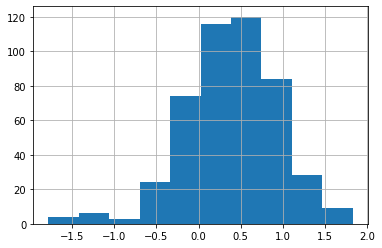

In [117]:
data['△G*OH'].hist()
# plt.tight_layout()

In [118]:
X_OH = data.iloc[:,0:-1]
y_OH = data['△G*OH']

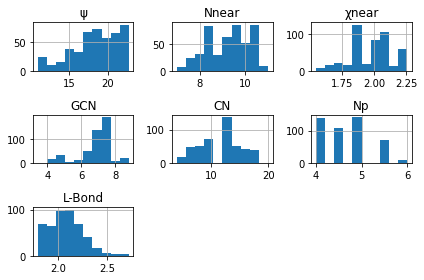

In [119]:
X_OH.hist()
plt.tight_layout()

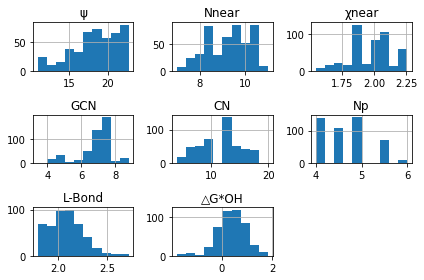

In [120]:
data.hist()
plt.tight_layout()
plt.savefig('data_analysis_OH.tif')

In [121]:
x_train,x_test,y_train,y_test = train_test_split(X_OH,y_OH,test_size=0.2,random_state=1)

# RF

In [122]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(random_state=2)
parameters= {
    'min_samples_leaf':list(range(1,10,2)),
    'n_estimators':list(range(16,18,2)),
    'max_depth':list(range(1,10,2))
}
grid = GridSearchCV(estimator=RandomForestRegressor(random_state=2) ,param_grid=parameters,n_jobs= -1,cv=10)
RFR_model = grid.fit(x_train,y_train)
print(RFR_model.best_params_)
RFR_pred_train = RFR_model.predict(x_train)
mae = mean_absolute_error(y_train,RFR_pred_train)
print("train MAE = {:.3f}".format(mae))

mse = mean_squared_error(y_train,RFR_pred_train)
print("train MSE = {:.3f}".format(mse))

R2_train = r2_score(y_train,RFR_pred_train)
print("train R2 = {:.3f}".format(R2_train))

print("train RMSE = {:.3f}".format(np.sqrt(mse)))

print()
RFR_pred = RFR_model.predict(x_test)
mae = mean_absolute_error(y_test,RFR_pred)
print("test MAE = {:.3f}".format(mae))

mse = mean_squared_error(y_test,RFR_pred)
print("test MSE = {:.3f}".format(mse))

R2_test = r2_score(y_test,RFR_pred)
print("test R2 = {:.3f}".format(R2_test))

print("test RMSE = {:.3f}".format(np.sqrt(mse)))

{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 16}
train MAE = 0.193
train MSE = 0.068
train R2 = 0.785
train RMSE = 0.261

test MAE = 0.179
test MSE = 0.052
test R2 = 0.821
test RMSE = 0.227


# cross-validation-MAE

In [123]:
RFR_model = grid.best_estimator_
rf_mae = cross_val_score(RFR_model,X_OH,y_OH,cv=10,scoring="neg_mean_absolute_error")
print(np.abs(rf_mae))

[0.31516752 0.14507614 0.20500363 0.22000276 0.20422988 0.19140851
 0.36346084 0.29337786 0.33348167 0.28633085]


In [124]:
print(np.mean(np.abs(rf_mae)))

0.25575396793466165


# cross-validation-MSE

In [125]:
rf_mse = cross_val_score(RFR_model,X_OH,y_OH,cv=10,scoring="neg_mean_squared_error")
print(np.abs(rf_mse))

[0.17179592 0.04042373 0.05766234 0.07182675 0.06258966 0.05255995
 0.25212906 0.14347267 0.20952073 0.15068847]


In [126]:
print(np.mean(np.abs(rf_mse)))

0.12126692937384886


# cross-validation-RMSE

In [127]:
rf_rmse = cross_val_score(RFR_model,X_OH,y_OH,cv=10,scoring="neg_root_mean_squared_error")
print(np.abs(rf_rmse))

[0.41448272 0.20105655 0.24012985 0.26800513 0.25017925 0.22925956
 0.50212455 0.37877786 0.45773435 0.38818613]


In [128]:
print(np.mean(np.abs(rf_rmse)))

0.3329935948325161


# ETR

In [129]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor()


parameters= {
    'min_samples_leaf':list(range(1,10,2)),
    'n_estimators':list(range(10,12,2)),
    'max_depth':list(range(1,10,2))
}

grid = GridSearchCV(estimator=ExtraTreesRegressor(random_state=2) ,param_grid=parameters,n_jobs= -1,cv=10)
etr_model = grid.fit(x_train,y_train)
best_parameters = grid.best_params_
print(best_parameters)


y_etr_pre_train = etr_model.predict(x_train)
y_etr_pred = etr_model.predict(x_test)


mae_train = mean_absolute_error(y_etr_pre_train,y_train)
mse_train = mean_squared_error(y_etr_pre_train,y_train)
R2_train = r2_score(y_train,y_etr_pre_train)
print('training R2 = {:.3f} V'.format(R2_train))
print('training mae = {:.3f} V'.format(mae_train))
print('training mse = {:.3f} V'.format(mse_train))
print('training RMSE = {:.3f} V'.format(np.sqrt(mse_train)))

print()

mae_test = mean_absolute_error(y_etr_pred,y_test)
mse_test = mean_squared_error(y_etr_pred,y_test)
R2_test = r2_score(y_test,y_etr_pred)
print('test R2 = {:.3f} V'.format(R2_test))
print('test mae = {:.3f} V'.format(mae_test))
print('test mse = {:.3f} V'.format(mse_test))
print('test RMSE = {:.3f} V'.format(np.sqrt(mse_test)))

{'max_depth': 9, 'min_samples_leaf': 3, 'n_estimators': 10}
training R2 = 0.866 V
training mae = 0.146 V
training mse = 0.042 V
training RMSE = 0.206 V

test R2 = 0.817 V
test mae = 0.187 V
test mse = 0.053 V
test RMSE = 0.230 V


# GBR

In [130]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
parameters= {
    'min_samples_leaf':list(range(1,10,2)),
    'n_estimators':list(range(22,24,2)),
    'max_depth':list(range(1,10,2))
}

grid = GridSearchCV(estimator=GradientBoostingRegressor(random_state=2) ,param_grid=parameters,n_jobs= -1,cv=10)
GBR_model = grid.fit(x_train,y_train)
best_parameters = grid.best_params_
print(best_parameters)


y_GBR_pre_train = GBR_model.predict(x_train)
y_GBR_pred = GBR_model.predict(x_test)

mae_train = mean_absolute_error(y_GBR_pre_train,y_train)
mse_train = mean_squared_error(y_GBR_pre_train,y_train)
R2_train = r2_score(y_train,y_GBR_pre_train)
print('training R2 = {:.3f} '.format(R2_train))
print('training mae = {:.3f} '.format(mae_train))
print('training mse = {:.3f} '.format(mse_train))
print('training RMSE = {:.3f} '.format(np.sqrt(mse_train)))

print()

mae_test = mean_absolute_error(y_GBR_pred,y_test)
mse_test = mean_squared_error(y_GBR_pred,y_test)
R2_test = r2_score(y_test,y_GBR_pred)
print('test R2 = {:.3f} '.format(R2_test))
print('test mae = {:.3f} '.format(mae_test))
print('test mse = {:.3f} '.format(mse_test))
print('test RMSE = {:.3f} '.format(np.sqrt(mse_test)))

{'max_depth': 5, 'min_samples_leaf': 9, 'n_estimators': 22}
training R2 = 0.834 
training mae = 0.166 
training mse = 0.053 
training RMSE = 0.230 

test R2 = 0.813 
test mae = 0.184 
test mse = 0.054 
test RMSE = 0.232 


# XGBR

In [131]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgbr = XGBRegressor(random_state = 12)

xgbr_grid = {
    'min_samples_leaf':list(range(1,10,2)),
    'n_estimators':list(range(30,32,2)),
    'max_depth':list(range(1,10,2))
}
#fold = RepeatedKFold(n_splits = 5,n_repeats = 1,random_state = 42)
xgbr_grid_cv = GridSearchCV(estimator = xgbr, cv = 10,
            param_grid = xgbr_grid, n_jobs = -1, scoring='neg_root_mean_squared_error',
            verbose = 1, return_train_score = True)

model = xgbr_grid_cv.fit(x_train,y_train)

print(model.best_params_)

xgbr_preds = model.predict(x_train)

from sklearn.model_selection import cross_val_score

xgbr_optimized = xgbr_grid_cv.best_estimator_

#rmse_score = cross_val_score(xgbr_optimized, data, target_2, cv = 10, scoring='neg_root_mean_squared_error')
#mae_score = cross_val_score(xgbr_optimized, data, target_2, cv = 10, scoring='neg_mean_absolute_error')
#optimized_xgbr_rmse = np.abs(rmse_score).mean()
#optimized_xgbr_mae = np.abs(mae_score).mean()
xgbr_model = xgbr_grid_cv.best_estimator_
xgbr_preds_train = xgbr_model.predict(x_train)
xgbr_preds_1 = xgbr_model.predict(x_test)


mae_train = mean_absolute_error(xgbr_preds_train,y_train)
mse_train = mean_squared_error(y_train,xgbr_preds_train)
R2_train = r2_score(y_train,xgbr_preds_train)
print('training R2 = {:.3f} '.format(R2_train))
print('training mae = {:.3f} '.format(mae_train))
print('training mse = {:.3f} '.format(mse_train))
print('training RMSE = {:.3f} '.format(np.sqrt(mse_train)))

print()

mae_test = mean_absolute_error(xgbr_preds_1 ,y_test)
mse_test = mean_squared_error(xgbr_preds_1 ,y_test)
R2_test = r2_score(y_test,xgbr_preds_1)
print('test R2 = {:.3f} '.format(R2_test))
print('test mae = {:.3f} '.format(mae_test))
print('test mse = {:.3f} '.format(mse_test))
print('test RMSE = {:.3f} '.format(np.sqrt(mse_test)))

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[13:30:50] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


{'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 30}
training R2 = 0.977 
training mae = 0.061 
training mse = 0.007 
training RMSE = 0.085 

test R2 = 0.827 
test mae = 0.175 
test mse = 0.050 
test RMSE = 0.224 


In [132]:
data_train = pd.DataFrame({"y_train":y_train,"y_train_pred":xgbr_preds_train})
data_train

y_train  y_train_pred
250  0.113423      0.118531
232 -0.193053     -0.237646
162  0.568442      0.528156
314 -1.577789     -1.643547
18   1.236415      1.257737
..        ...           ...
255  0.371682      0.341252
72   0.128969      0.084831
396  0.148828      0.190962
235  0.084064      0.098800
37   1.560956      1.451399

[374 rows x 2 columns]

In [133]:
data_train.to_csv("xgbr_train_pred_OH.csv",index=False)

In [134]:
data_test = pd.DataFrame({"y_test":y_test,"y_test_pred":xgbr_preds_1})
data_test

y_test  y_test_pred
330 -0.362292     0.072568
401 -0.560077    -0.278801
218  0.391644     0.494506
233 -0.117429     0.014779
67   0.468667     0.079366
..        ...          ...
353 -0.439437    -0.276620
78   0.415295     0.634516
453  0.938639     1.058788
394  0.532911     0.807480
386  0.213017     0.260814

[94 rows x 2 columns]

In [135]:
data_test.to_csv("xgbr_test_pred_OH.csv",index=False)

# Plot

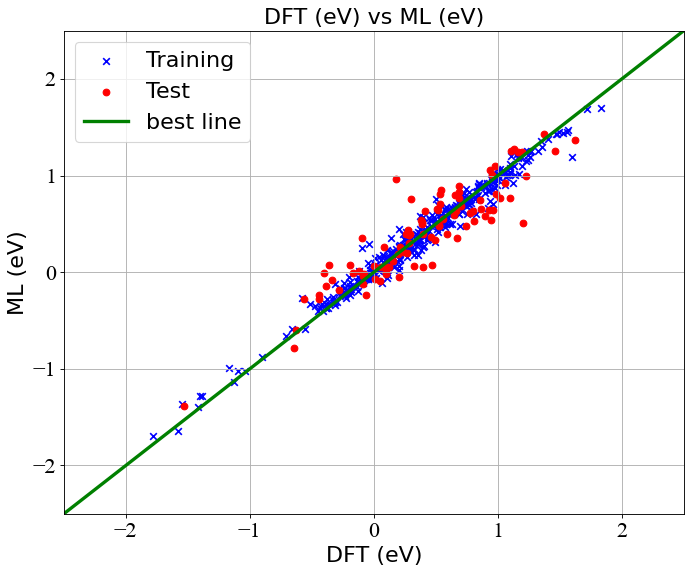

In [136]:
import matplotlib.pyplot as plt
# 1、创建画布
plt.figure(figsize=(10, 8), dpi=80)
plt.title('DFT (eV) vs ML (eV)', size = 20)
plt.xlabel('DFT (eV)', size = 20)
plt.ylabel('ML (eV)', size = 20)
plt.axis([-2.5, 2.5, -2.5, 2.5])
plt.xticks(fontproperties = 'Times New Roman', size = 20)
plt.yticks(fontproperties = 'Times New Roman', size = 20)
plt.grid(True)
# X = y_test
# y = y_predict

# 2、绘制图像
plt.scatter(y_train, xgbr_preds_train,  color="blue", marker = 'x', label = 'Training')
plt.scatter(y_test, xgbr_preds_1, color="red", label = 'Test')

plt.legend(loc=2,fontsize=20)    


# y_train_predict = estimator1.predict(y_train)
#     plt.plot(y_train, y_train_predict, color='black', linewidth=3, label="best line")

# 线能不能延长一些


import numpy as np
# 1、准备x，y数据
x = np.linspace(-2.5, 2.5, 1000)
y =  x 

plt.plot(x, y, color='green', linewidth=3, label="best line")
plt.legend(loc=2,fontsize=20)   

# Predict

In [137]:
data_validation = pd.read_excel('validation_set_predict.xlsx',sheet_name='OH_free_energy_predict')

In [138]:
data_validation

Unnamed: 0                       Structure          ψ      Nnear     χnear  \
0           1      CuAu_mp-522-bridge3OH.vasp  24.164976  11.000000  2.196816   
1           2      CuAu_mp-522-hollow5OH.vasp  25.362942  11.000000  2.133957   
2           3    MnAu_mp-12675-bridge2OH.vasp  17.411169   8.892395  2.013222   
3           4  PdAu_mp-1219920-bridge3OH.vasp  22.000000  10.604066  2.403419   
4           5  ZnAg_mp-1187974-bridge5OH.vasp  20.502539  11.489125  1.784517   
5           6  ZnAg_mp-1215437-hollow6OH.vasp  21.230000  11.741785  1.715941   
6           7   ZnNi_mp-567903-bridge3OH.vasp  19.800000  10.000000  1.880000   
7           8      ZnPt_mp-894-bridge3OH.vasp  21.247122  11.013351  1.921226   

        GCN  CN        Np    L-Bond      G_OH  
0  6.666667  12  4.898979  2.134252  0.638552  
1  6.909091  15  4.898979  2.255766  0.611300  
2  7.166667  17  4.898979  2.403024  0.552484  
3  7.333333  13  5.477226  2.169372  0.867692  
4  6.375000  10  4.472136  2.133534  0.347496  
5  6.666667   8  4.472136  2.150012  0.685402  
6  2.666667   4  4.000000  2.119198  0.219189  
7  7.166667  17  4.898979  2.417972  0.670298

In [139]:
x_data_validation = data_validation.iloc[:,2:-1]

y_data_validation = data_validation.iloc[:,-1]

In [140]:
y_validation_predict = xgbr_model.predict(x_data_validation)

In [141]:
pd.DataFrame({"y_validation":y_data_validation,"y_validation_pred":y_validation_predict})

y_validation  y_validation_pred
0      0.638552           0.756452
1      0.611300           0.891813
2      0.552484           0.533663
3      0.867692           1.024443
4      0.347496           0.354888
5      0.685402           0.815856
6      0.219189           0.171923
7      0.670298           0.710576

In [142]:
data_validation_table = pd.DataFrame({"y_validation":y_data_validation,"y_validation_pred":y_validation_predict})
data_validation_table

y_validation  y_validation_pred
0      0.638552           0.756452
1      0.611300           0.891813
2      0.552484           0.533663
3      0.867692           1.024443
4      0.347496           0.354888
5      0.685402           0.815856
6      0.219189           0.171923
7      0.670298           0.710576

In [143]:
data_validation_table.to_csv("xgbr_validation_pred_OH.csv",index=False)

# export data

In [144]:
X_OH = data.iloc[:,0:-1]
y_OH = data['△G*OH']

In [145]:
y_origin_data_predict = xgbr_model.predict(X_OH)

In [146]:
data_origin_data_table = pd.DataFrame({"y_origin":y_OH,"y_origin_pred":y_origin_data_predict})
data_origin_data_table

y_origin  y_origin_pred
0    0.646847       0.622349
1    1.229492       1.149485
2    0.191494       0.184096
3    0.633768       0.666151
4    0.327195       0.068233
..        ...            ...
463  0.685967       0.665787
464  0.516128       0.420567
465  0.697114       0.755475
466  0.920556       0.841194
467  0.265295       0.353678

[468 rows x 2 columns]

In [147]:
data_origin_data_table.to_csv("xgbr_origin_pred_OH.csv",index=False)

# SHAP

In [148]:
import shap

In [149]:
shap_values = shap.TreeExplainer(xgbr_model).shap_values(x_test)

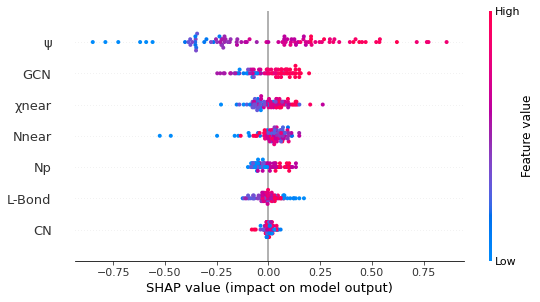

In [150]:
shap.summary_plot(shap_values,x_test,show=False)
plt.savefig('shap_feature_value_OH')

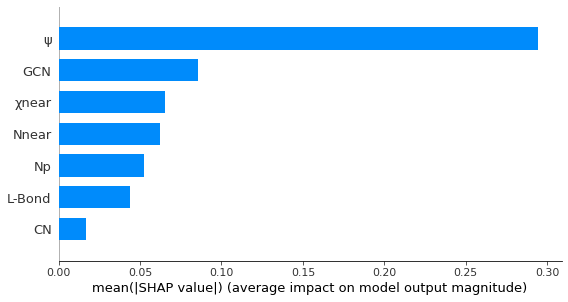

In [151]:
shap.summary_plot(shap_values,x_test,plot_type='bar',show=False)
plt.savefig('features_importance_OH')

In [152]:
def main(random_states,R2_trains, R2_tests):
    x_train,x_test,y_train,y_test = train_test_split(X_O,y_O,test_size=0.2,random_state=random_states)
    from sklearn.ensemble import RandomForestRegressor

    RFR = XGBRegressor(random_state=2)
    parameters= {
        'n_estimators':list(range(100,102,2)),
    }
    grid = GridSearchCV(estimator=RandomForestRegressor(random_state=2) ,param_grid=parameters,n_jobs= -1,cv=10)
    RFR_model = grid.fit(x_train,y_train)
    RFR_model = RFR_model.best_estimator_
    RFR_pred_train = RFR_model.predict(x_train)

    R2_train = r2_score(y_train,RFR_pred_train)
    print("train R2 = {:.4f}".format(R2_train))

    RFR_pred = RFR_model.predict(x_test)
    R2_test = r2_score(y_test,RFR_pred)
    print("test R2 = {:.4f}".format(R2_test))
    R2_trains.append(R2_train)
    R2_tests.append(R2_test)

In [153]:
R2_tests = []
R2_trains = []

for i in range(0,10):
    print("当random_values是: ",i)
    random_values = i
    main(random_values,R2_trains, R2_tests)

当random_values是:  0
train R2 = 0.9629
test R2 = 0.6811
当random_values是:  1
train R2 = 0.9557
test R2 = 0.8527
当random_values是:  2
train R2 = 0.9582
test R2 = 0.6692
当random_values是:  3
train R2 = 0.9588
test R2 = 0.7890
当random_values是:  4
train R2 = 0.9603
test R2 = 0.7003
当random_values是:  5
train R2 = 0.9622
test R2 = 0.7240
当random_values是:  6
train R2 = 0.9575
test R2 = 0.7938
当random_values是:  7
train R2 = 0.9600
test R2 = 0.7508
当random_values是:  8
train R2 = 0.9559
test R2 = 0.7181
当random_values是:  9
train R2 = 0.9614
test R2 = 0.7224


In [154]:
data_R2_f = pd.DataFrame({"R2_train":R2_trains,"R2_test":R2_tests})
data_R2_f

R2_train   R2_test
0  0.962935  0.681131
1  0.955695  0.852715
2  0.958151  0.669220
3  0.958806  0.789012
4  0.960322  0.700282
5  0.962212  0.723995
6  0.957474  0.793823
7  0.959958  0.750842
8  0.955878  0.718089
9  0.961428  0.722357

In [155]:
data_R2_f = data_R2_f.sort_values(by="R2_test",ascending=False)
data_R2_f

R2_train   R2_test
1  0.955695  0.852715
6  0.957474  0.793823
3  0.958806  0.789012
7  0.959958  0.750842
5  0.962212  0.723995
9  0.961428  0.722357
8  0.955878  0.718089
4  0.960322  0.700282
0  0.962935  0.681131
2  0.958151  0.669220